# Baseline Data Loaders
Data loaders that use either no augmentation or very few

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from bataug.loaders.noaug import FixedCycleDataset
from pathlib import Path
import pandas as pd

Configuration

In [2]:
num_cells: int = 4  # Number of cells to display

## Pull in Some Example Data
Load a few example datasets 

In [3]:
cycle_data = [
    pd.read_csv(p) for p in sorted(Path('../0_pull-benchmark-data/data/processed/severson_2019/').glob('discharge_*csv.gz'))[:num_cells]
]

In [4]:
summary_data = [
    pd.read_csv(p) for p in sorted(Path('../0_pull-benchmark-data/data/processed/severson_2019/').glob('summary_*csv.gz'))[:num_cells]
]

## Demonstrate the Baseline Loader
Just renders the first $N$ cycles

In [5]:
loader = FixedCycleDataset(train_cycles=100, cycles=cycle_data, summaries=summary_data, batch_size=4)

In [6]:
%%time
images, outputs, output_masks = next(iter(loader))

CPU times: user 137 ms, sys: 6.01 ms, total: 143 ms
Wall time: 123 ms


In [7]:
outputs

array([[ 0.0000000e+00, -7.4800000e-05, -6.0900000e-05, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -4.7200000e-05, -1.6080000e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -2.1800000e-05, -3.0200000e-05, ...,
        -1.1677506e-01, -1.1775424e-01, -1.1877515e-01],
       [ 0.0000000e+00, -4.6600000e-05, -8.7200000e-05, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]])

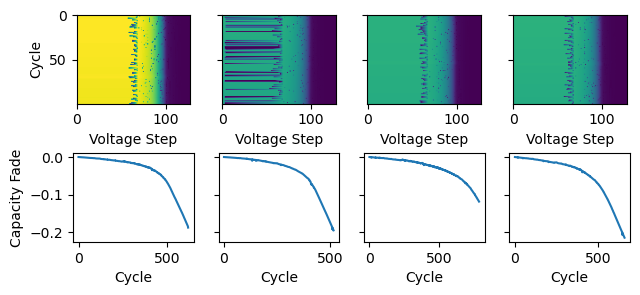

In [8]:
fig, axs = plt.subplots(2, 4, figsize=(6.5, 3.), sharey='row')

for image, ax in zip(images, axs[0, :]):
    ax.imshow(image)
    ax.set_xlabel('Voltage Step')
axs[0, 0].set_ylabel('Cycle')
    
for fade, mask, ax in zip(outputs, output_masks, axs[1, :]):
    ax.plot(fade[mask])
    ax.set_xlabel('Cycle')
axs[1, 0].set_ylabel('Capacity Fade')
    
fig.tight_layout()